In [46]:
# Imports
import math
import numpy as np
from matplotlib import pyplot as plt, patches

In [47]:
# Variables

m = 85000
c = 6
aL = 30
aD = 2
Tmin = 40000
Tmax = 80000
omin = -22.5
omax = 22.5
Vmin = 180
Vmax = 240
ymin = -22.5
ymax = 22.5

g = 9.8
dt = 0.001
T = 2.5

In [48]:
# Dynamics

def Vt(V, y):
    Vt = - aD * V ** 2 / m - g * math.sin(2 * math.pi / 180 * y) + 1 / m * u1
    return Vt

def yt(V, y):
    yt = aL * y * (1 - c * V) / m - g * math.cos(2 * math.pi / 180 * y) / V + aL * c * V / m * u2
    return yt

In [49]:
# Simulation loop

ts = np.arange(0, T, dt)
Vs = np.zeros(ts.size)
ys = np.zeros(ts.size)

# Initial conditions

Vs[0] = np.random.rand() * (Vmax - Vmin) + Vmin
ys[0] = np.random.rand() * (ymax - ymin) + ymin

for i in range(1, ts.size):

    dx = (ys[i] - ys[i - 1]) / (Vs[i] - Vs[i - 1])

    if dx < 0:
        u1 = Tmin
    else:
        u1 = Tmax

    if dx ** (-1) < 0:
        u2 = omin
    else:
        u2 = omax

    if i == 1:
        u1 = 0; u2 = 0

    Vs[i] = Vs[i - 1] + Vt(Vs[i - 1], ys[i - 1]) * dt
    ys[i] = ys[i - 1] + yt(Vs[i - 1], ys[i - 1]) * dt

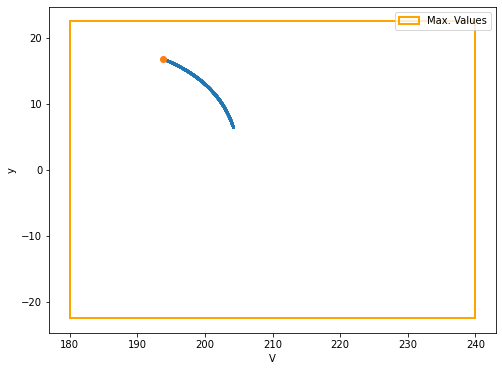

In [50]:
fig = plt.figure(figsize =(8, 6))
ax = plt.axes()

box = ax.add_patch(patches.Rectangle((Vmin, ymin), Vmax - Vmin, ymax - ymin, edgecolor='orange',
   facecolor='none', linewidth=2))
box.set_label("Max. Values")

ax.scatter(Vs, ys, s=2)
ax.scatter(Vs[-1], ys[-1])

ax.set(xlabel="V", ylabel="y")
ax.legend()

plt.show()